In [1]:
import torch
from torchvision import transforms
from torchvision.datasets import MNIST, CIFAR10
from torch.utils.data.dataloader import DataLoader
from autoencoder_class import Autoencoder_conv
import torch.nn as nn
import matplotlib.pyplot as plt
from autoencoder_functions_conv import fit
from sklearn import metrics
import numpy as np

BATCH_SIZE = 50
EPOCHS = 10

# Transforms
transform = transforms.Compose([transforms.ToTensor()])

# Train_dataset
train_dataset = CIFAR10(
    root="../../data/CIFAR10",train=True, transform=transform, download=True
)
# Test_dataset
test_dataset = CIFAR10(
    root="../../data/CIFAR10", train=False, transform=transform, download=True
)
# Train_dataloader
train_dl = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True
)
# Test_dataloader
test_dl = torch.utils.data.DataLoader(
    test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4
)

# Iterator
dataiter = iter(train_dl)
# Runs through the batches of data
data=dataiter.next() 

#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Autoencoder object
model = Autoencoder_conv()
# load it to the specified device, either gpu or cpu
model.to(device=device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-5)

# Calling fit method for training
outputs = fit(epochs=EPOCHS,model=model, criterion=criterion,optimizer=optimizer,
            train_dl=train_dl,test_dl=test_dl,metric=None)

Files already downloaded and verified
Epoch:1,Loss:0.0415
Epoch:2,Loss:0.0399
Epoch:3,Loss:0.0376
Epoch:4,Loss:0.0397
Epoch:5,Loss:0.0410
Epoch:6,Loss:0.0348
Epoch:7,Loss:0.0329
Epoch:8,Loss:0.0466
Epoch:9,Loss:0.0340
Epoch:10,Loss:0.0374


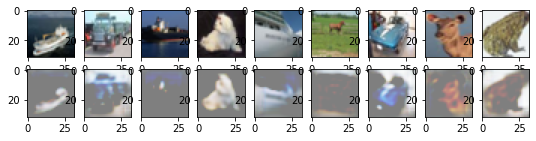

In [6]:
for k in range (0,EPOCHS,1):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].cpu().detach().numpy()
    imgs_recon =  outputs[k][2].cpu().detach().numpy()
    for batch_number,item in enumerate(imgs):
        if batch_number >= 9: break
        plt.subplot(2,9,batch_number + 1) 
        item = np.transpose(item,(1,2,0))  # shifting the channel to last tensor
        plt.imshow(item)
    for batch_number,item in enumerate(imgs_recon):
        if batch_number >= 9: break
        plt.subplot(2,9,9+batch_number + 1)
        item = np.transpose(item,(1,2,0))  # shifting the channel to last tensor
        plt.imshow(item)
    
    # imgs_actual_flat=outputs[k][1].view(-1, 784).cpu().detach().numpy()
    # imgs_recon_flat=outputs[k][2].view(-1, 784).cpu().detach().numpy()
    # score1=np.sqrt(metrics.mean_squared_error(imgs_actual_flat,imgs_recon_flat))
    # print(score1)
    break